In [45]:
import pandas as pd
import re
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
li = pd.read_csv("../data/listings.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
for col in li.columns:
    print(col)
    print(li.iloc[0][col])
    print("")

id
1419

listing_url
https://www.airbnb.com/rooms/1419

scrape_id
20190307044035

last_scraped
2019-03-07

name
Beautiful home in amazing area!

summary
This large, family home is located in one of Toronto's most vibrant downtown neighbourhoods. The five-bedroom, three-bath house is newly renovated and complete with all the amenities you'll need for a fabulous time in the city.

space
Visit Toronto with this fabulous furnished home as your base! This lovely home is surrounded by gardens in the back and front. Inside, you'll find a large open space with a modern kitchen and bright living and dining room. There are two floors up - a master bedroom with a king-size bed and two kids rooms, each with a single bed. The attic is a private space with a king-sized bed, fold-out single couch and a private deck. The basement is fully-finished with a private room and bath, as well as a playroom with another single couch that doubles as a sleeping space. The house will comfortably sleep 10.  For ki

In [53]:
#Casting the datatype to the correct ones
li['price'] = li['price'].astype("str").map(lambda x: x.replace("$","")).map(lambda x: x.replace(",","")).astype("float64")

In [10]:
li["property_type"].nunique()

33

In [11]:
li["property_type"].unique()

array(['House', 'Apartment', 'Condominium', 'Bungalow', 'Townhouse',
       'Serviced apartment', 'Guest suite', 'Bed and breakfast',
       'Guesthouse', 'Loft', 'Aparthotel', 'Parking Space', 'Cottage',
       'Treehouse', 'Boat', 'Hostel', 'Other', 'Tent', 'Cabin', 'Villa',
       'Barn', 'Farm stay', 'Tiny house', 'Earth house', 'Castle',
       'Camper/RV', 'Cave', 'Boutique hotel', 'Hotel', 'Dorm',
       'Dome house', 'Casa particular (Cuba)', 'Hut'], dtype=object)

In [12]:
bp = li[["price","property_type"]]

<Figure size 1440x360 with 0 Axes>

In [15]:
bp["price"].astype("float64")

ValueError: could not convert string to float: '$469.00'

In [ ]:
plt.figure(figsize=(20,5))
bp.boxplot(column='price', by='property_type')

In [ ]:
li["zipcode"].nunique()

In [37]:
li["reviews_per_month"].max()

15.85

In [34]:
li.drop(columns=["experiences_offered"], inplace=True)

In [32]:
sorted(li["experiences_offered"].unique())

['none']

In [28]:
sorted(list(li.columns))

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [16]:
price = li['price'].astype("str").map(lambda x: x.replace("$","")).map(lambda x: x.replace(",","")).astype("float64")

In [17]:
li["price"] = price

In [25]:
li["price"].min()

0.0

In [24]:
li["price"].max()

13395.0

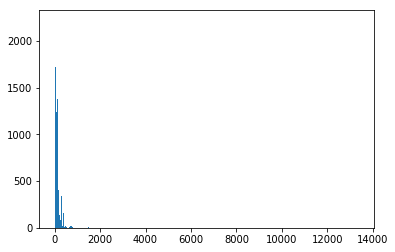

In [23]:
plt.hist(price, 1000)
plt.show()

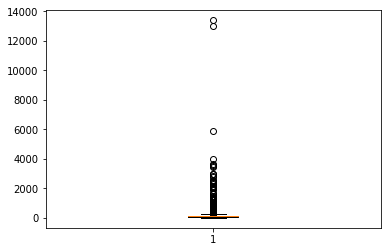

In [19]:
plt.boxplot(price)
plt.show()

In [32]:
review_cols = [col for col in li.columns if col.split("_")[0].lower() == "review"]
print(review_cols)

li[review_cols].head(10)

['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95.0,10.0,10.0,10.0,10.0,9.0,9.0
4,95.0,9.0,9.0,9.0,9.0,10.0,9.0
5,98.0,10.0,10.0,10.0,10.0,10.0,10.0
6,97.0,10.0,10.0,10.0,10.0,10.0,10.0
7,100.0,NaN,NaN,NaN,NaN,NaN,NaN
8,92.0,9.0,9.0,10.0,10.0,9.0,9.0
9,94.0,10.0,10.0,10.0,10.0,9.0,10.0


In [39]:
li["review_scores_value"].astype("float64").unique()

array([10., nan,  9.,  8.,  7.,  2.,  6.,  4.,  5.,  3.])

In [ ]:
np.count_nonzero

In [51]:
pd.pivot_table(li[["review_scores_value","price"]], 
               index=["review_scores_value"],
              values=["price"])

,price
review_scores_value,
2.0,150.594595
3.0,40.500000
4.0,129.758621
5.0,95.068966
6.0,139.528926
7.0,108.680672
8.0,125.055236
9.0,130.418473
10.0,132.791023


KeyboardInterrupt: 

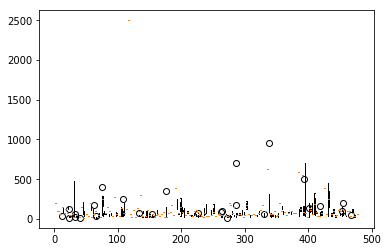

In [20]:
li.boxplot(column='price', by='zipcode')